In [1]:
import numpy as np
import random
from random import randint
import statistics
import matplotlib.pyplot as plt

In [54]:
# Parameters

#Size of population
population_size = 100
#String length
length_of_string = 30
#Chance of parent crossover occurring 
crossover_rate = 0.9
#Chance of mutation occurring
mutation_rate = 0.5
#Total generations produced
num_generations = 15
#Array to store averages
averages = []
#Target value of a bit string in the population
target_value = "010011100011001011111100001101"

In [55]:
def genetic_algorithm(population):
    
    #Loop through generations
    for generations in range(num_generations):
        parents = []
        children = []

        #Calculate total fitness scores for the population
        scores = [fitness(x) for x in population]
        

        averages.append(statistics.fmean(scores))

        #Print scores of current generation
        best_index, best_score = scores.index(max(scores)), max(scores)
        print(f'Generation {generations+1}')
        print(f'Best item: {population[best_index]}')
        print(f'Item score: {best_score}')
        print(f'Generation average score: {averages[generations]}\n')

        # Find parent chromosomes of next generation via selection
        for i in range(population_size):
            parents.append(tournament_selection(population, scores))

        # Pair up chromosome with the one right after it
        for i in range(0, population_size, 2):
            parent_1, parent_2 = parents[i], parents[i+1]

            # Perform crossover, mutate children and append to list
            for child in one_point_crossover(parent_1, parent_2):
                child = mutate(child)
                children.append(child)

        # Replace current generation with children
        population = children
        print(len(averages))

In [56]:
def main():
    # Target of GA is 010011100011001011111100001101
    print(f'Target string is 010011100011001011111100001101')
    
    population = []
    for i in range(population_size):
        chrom = []
        for j in range(length_of_string):
            chrom.append(random.choice("01"))
        population.append(chrom)
        
    population = [''.join(sublist) for sublist in population]
    population[0] = "000000000000000000000000000000"
    print(population)
    genetic_algorithm(population)
    plot_averages(averages, num_generations)

Target string is 010011100011001011111100001101
['000000000000000000000000000000', '101000110010101100011010100011', '001000010110101011010100101110', '101100101001110011110010000001', '101010110110110101000010101111', '001101101000100011110110011010', '001101001001110000101110100011', '111001011011101001101110001101', '100100000101010111101110001010', '001101111010100011110101011001', '110001010110111110000011100111', '101000110001010100011010110010', '111000100101101110000110111001', '110111110010111010001010100110', '010110000010100110100110010100', '100100010010000110011100111010', '101010011100111100000100110001', '010111001011011011111011100000', '110000001010010011011111001110', '000110111100101111001000001010', '010001000011001001101111011111', '100111111010100101100000011001', '010000110010010101100010110001', '100000100010010001001100001001', '100101111100101000011000101101', '111000111100000101110011110101', '000101101100001001110100010001', '110001011010111001110111111100',

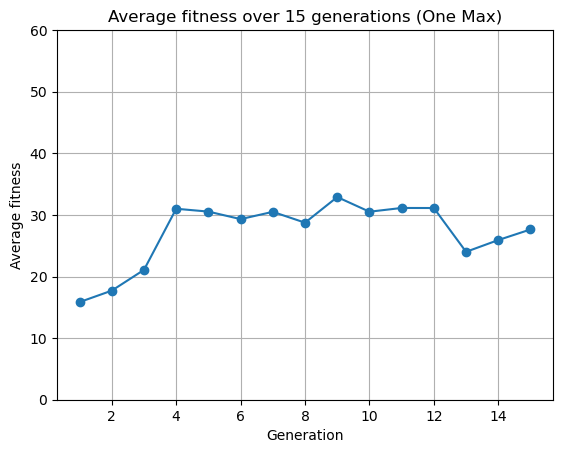

In [57]:
main()

In [36]:
import numpy as np

def fitness(binary_string):
    count = 0

    for bit in binary_string:
        if bit == '1':
            count += 1
    if(count == 0):
        return 2 * len(binary_string)

    return count


In [5]:
mutation_rate = 0.4

def mutate(bit_string):

    random_index = random.randint(0, 29)
    bit_string = list(bit_string)

    if np.random.rand() < mutation_rate:
        
        if bit_string[random_index] == '0':
            bit_string[random_index] = '1' 
                      
    return ''.join(bit_string)

In [6]:
def one_point_crossover(parent1, parent2):
    
    
    crossover_point = random.randint(0, len(parent1))
    offspring1 = parent1[:crossover_point] + parent2[crossover_point:]
    offspring2 = parent2[:crossover_point] + parent2[crossover_point:]
    
    return offspring1, offspring2

In [7]:
parent1 = '110101010110110010010101011001'
parent2 = '001110011011010100111101000101'

offspring1, offspring2 = one_point_crossover(parent1, parent2)
print("Offspring 1:", offspring1)
print("Offspring 2:", offspring2)

Offspring 1: 110110011011010100111101000101
Offspring 2: 001110011011010100111101000101


In [8]:
def tournament_selection(population, scores, rounds=5):
    # Pick some random index in population
    best_chrom = random.randint(0, population_size-1)
    
    #Choose opposing individuals randomly
    for chrom in range(rounds+1):
        chrom_index = random.randint(0, population_size-1)
        
        # Find best score in tournament round
        if scores[chrom_index] > scores[best_chrom]:
            best_chrom = chrom
    return population[best_chrom]

In [9]:
def plot_averages(averages, generations):
    print("Length of averages:", len(averages))
    print("Length of generations:", generations)
    plt.plot(range(1, generations+1), averages, marker='o')
    plt.title(f'Average fitness over {generations} '
              'generations (One Max)')
    ax=plt.gca()
    ax.set_ylim([0,60])
    plt.xlabel('Generation')
    plt.ylabel('Average fitness')
    plt.grid(True)
    plt.show()